In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, LSTM, Dropout
from tensorflow.keras.models import Sequential

plt.rcParams["figure.figsize"] = (20,3)

In [10]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")

In [11]:
print(len(train))
print(len(test))

57340
60172


In [12]:
train.head()

Trip  VehicleSpeed_km_h_  Battery_Status
0  1567                7.76             0.0
1  1567                4.91             0.0
2  1567                3.47             0.0
3  1567                3.47             0.0
4  1567                0.00             0.0

In [13]:
print(train['Trip'].unique())
print("-----------------------------------")
print("Number of trips in Train dataset: {}".format(train['Trip'].nunique()))

[1567 1568 1572 1578 1582 1585 1599 1601 1602 1625 1638 1644 1707 1721
 1727 1728 1737 1761 1765 1769 1778 1793 1808 1814 1816 1817 1824 1835
 1838 1850 1875 1878 1914 1928 1936 1949 1951 1954 1996 2002 2011 2019
 2029 2034 2079 2095 2099 2102 2107 2121 2133 2143 2144 2146 2161 2175
 2200 2213 2219 2253 2265 2272 2297 2320 2326 2338 2350 2384 2395 2397
 2400 2401 2402 2437]
-----------------------------------
Number of trips in Train dataset: 74


In [14]:
print(test['Trip'].unique())
print("-----------------------------------")
print("Number of trips in Test dataset: {}".format(test['Trip'].nunique()))

[1558 1561 1615 1629 1674 1712 1725 1756 1771 1781 1799 1804 1831 1849
 1871 1897 1920 1962 2010 2035 2105 2112 2150 2165 2180 2220 2255 2259
 2321 2328 2332 2382 2391 2410 2428 2444 2467 2485 2533 2536 2584 2612
 2628 2654 2710 2759 2775 2790 2806 2849 2874 2898 2931 2967 3018 3020
 3025 3062 3066 3096 3130 3150 3223 3234 3271]
-----------------------------------
Number of trips in Test dataset: 65


In [15]:
total_data = pd.concat([train,test],axis=0)
total_data.drop(['Trip','Battery_Status'],axis=1,inplace=True)

In [41]:
total_data.describe()

VehicleSpeed_km_h_
count       167257.000000
mean            34.501975
std             22.608500
min              0.000000
25%             15.030000
50%             36.309998
75%             52.930000
max            103.430000

In [16]:
total_data = pd.concat([train,test],axis=0)

**Separating data into corresponding dataframes of values 1 and 0**

In [17]:
data_0s = total_data.loc[total_data['Battery_Status']==0]
data_1s = total_data.loc[total_data['Battery_Status']==1]
data_0s.drop(['Trip','Battery_Status'],axis=1,inplace=True)
data_1s.drop(['Trip','Battery_Status'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
print("Dataset contains {} rows of 1 labels and {} rows of 0 labels".format(len(data_0s),len(data_1s)))

Dataset contains 87988 rows of 1 labels and 29523 rows of 0 labels


In [19]:
data_0s.describe()

VehicleSpeed_km_h_
count        87988.000000
mean            34.158969
std             24.152030
min              0.000000
25%              9.320000
50%             37.275000
75%             54.539997
max            103.430000

In [20]:
data_1s.describe()

VehicleSpeed_km_h_
count        29523.000000
mean            32.915083
std             17.672286
min              0.000000
25%             19.320000
50%             32.349998
75%             46.439999
max            101.369995

**Visualization**

In [21]:
#train = pd.read_csv("/content/Train.csv")
trip_1567 = train.loc[train['Trip'] == 1928]
trip_1567.drop(['Trip'],axis=1)
trip_1567 = trip_1567[0:300]
time = [i for i in range(len(trip_1567))]
trip_1567.insert(0, 'index', range(0,len(trip_1567)))

In [22]:
train.groupby('Trip').count()

VehicleSpeed_km_h_  Battery_Status
Trip                                    
1567                 367             367
1568                 284             284
1572                 448             448
1578                 424             424
1582                 122             122
...                  ...             ...
2397                 657             657
2400                 153             153
2401                 955             955
2402                 664             664
2437                 710             709

[74 rows x 2 columns]

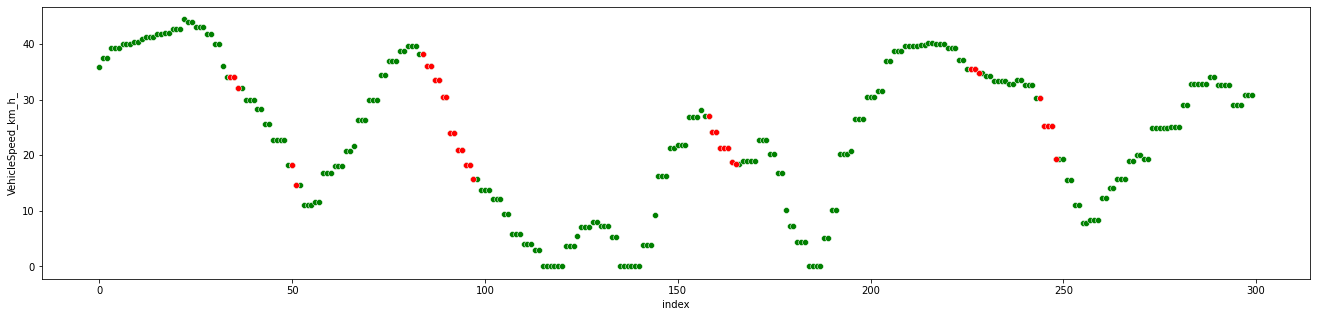

In [23]:
import seaborn as sns
fig = plt.figure(figsize=(50,5)) 
ax1=plt.subplot(121)

sns.scatterplot(x='index', y='VehicleSpeed_km_h_', data=trip_1567, color='green') # plot normal time series plot
sns.scatterplot(x='index', y= 'VehicleSpeed_km_h_', data=trip_1567[trip_1567['Battery_Status'] == 1], color='red')

## **Scaling Data**

In [24]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")

In [25]:
scaler = RobustScaler()
Train = scaler.fit_transform(train)
Test = scaler.fit_transform(test)

In [26]:
Train

array([[-0.85729276, -0.77179212,  0.        ],
       [-0.85729276, -0.84894426,  0.        ],
       [-0.85729276, -0.88792639,  0.        ],
       ...,
       [ 0.92235047, -0.20817544,  1.        ],
       [ 0.92235047, -0.20817544,  1.        ],
       [ 0.92235047, -0.21954523,  1.        ]])

In [27]:
train.columns

Index(['Trip', 'VehicleSpeed_km_h_', 'Battery_Status'], dtype='object')

In [28]:
Train = pd.DataFrame(Train, columns = ['Trip','Speed','Battery_Status'])
Test = pd.DataFrame(Test, columns = ['Trip','Speed','Battery_Status'])

Train = Train.drop(['Trip'],axis=1)
Test = Test.drop(['Trip'],axis=1)

Train['Trip'] = train['Trip']
Test['Trip'] = test['Trip']

Train.head()

Speed  Battery_Status  Trip
0 -0.771792             0.0  1567
1 -0.848944             0.0  1567
2 -0.887926             0.0  1567
3 -0.887926             0.0  1567
4 -0.981863             0.0  1567

In [29]:
Test.head()

Speed  Battery_Status  Trip
0  0.434519             0.0  1558
1  0.393894             0.0  1558
2  0.353268             0.0  1558
3  0.353268             1.0  1558
4  0.338885             1.0  1558

## **Creating dataset with a sequence of time steps for each sample using rolling window**

In [30]:
def create_dataset(data,time_steps):
  xs,ys = [],[]

  for i in range(len(data)-time_steps-1):
    trip = data['Trip'].iloc[i]
    trip_end_sequence = data['Trip'].iloc[i+time_steps]
    if trip_end_sequence != trip:
      continue
    else:
      vector = data['Speed'].iloc[i:(i+time_steps)].to_numpy()
      label = data['Battery_Status'].iloc[i+time_steps]
      xs.append(vector)
      ys.append(label)
  
  return np.array(xs), np.array(ys)

In [31]:
TIME_STEPS = 20

X_train, y_train = create_dataset(Train, TIME_STEPS)
X_test, y_test = create_dataset(Test, TIME_STEPS)

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(104364, 20)
(104364,)
(58871, 20)
(58871,)


In [33]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

## **Bidirectional LSTM**

In [60]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
        keras.layers.LSTM(
            units=128,
            input_shape = (1,20)
        )
    )
)
model.add(keras.layers.Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [61]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [63]:
history = model.fit(X_train,y_train, epochs=20, batch_size=32, callbacks=[callback], validation_split=0.2, shuffle=False)

Epoch 1/20
2610/2610 [==============================] - 18s 5ms/step - loss: 0.4010 - accuracy: 0.8215 - val_loss: 0.4068 - val_accuracy: 0.8245
Epoch 2/20
2610/2610 [==============================] - 13s 5ms/step - loss: 0.3577 - accuracy: 0.8503 - val_loss: 0.3890 - val_accuracy: 0.8332
Epoch 3/20
2610/2610 [==============================] - 13s 5ms/step - loss: 0.3463 - accuracy: 0.8554 - val_loss: 0.3788 - val_accuracy: 0.8380
Epoch 4/20
2610/2610 [==============================] - 13s 5ms/step - loss: 0.3378 - accuracy: 0.8594 - val_loss: 0.3716 - val_accuracy: 0.8414
Epoch 5/20
2610/2610 [==============================] - 13s 5ms/step - loss: 0.3319 - accuracy: 0.8616 - val_loss: 0.3650 - val_accuracy: 0.8452
Epoch 6/20
2610/2610 [==============================] - 13s 5ms/step - loss: 0.3272 - accuracy: 0.8643 - val_loss: 0.3588 - val_accuracy: 0.8484
Epoch 7/20
2610/2610 [==============================] - 13s 5ms/step - loss: 0.3236 - accuracy: 0.8662 - val_loss: 0.3536 - val_ac

In [65]:
pred = model.predict(X_test)

In [66]:
predicted_categories = [1 * (x[0]>=0.5) for x in pred]

In [67]:
report = classification_report(y_test, predicted_categories)
print(report)

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     43668
         1.0       0.85      0.66      0.74     15203

    accuracy                           0.88     58871
   macro avg       0.87      0.81      0.83     58871
weighted avg       0.88      0.88      0.88     58871



In [72]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_categories,labels=[0,1]))


[[41851  1817]
 [ 5109 10094]]


In [74]:
from sklearn.metrics import roc_auc_score
ns_auc = roc_auc_score(y_test, predicted_categories)
print(ns_auc)

0.8111692442561901


## **Stacked LSTM**

In [75]:
# Stacked LSTM 
model2 = Sequential()
model2.add(LSTM(50, activation='relu', return_sequences=True, input_shape = (1,20)))
model2.add(LSTM(50, activation='relu'))
model2.add(Dense(1))

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [76]:
history = model2.fit(X_train,y_train, epochs=20, batch_size=32, callbacks=[callback], validation_split=0.2, shuffle=False)

Epoch 1/20
2610/2610 [==============================] - 12s 4ms/step - loss: 0.4635 - accuracy: 0.8117 - val_loss: 0.4622 - val_accuracy: 0.8111
Epoch 2/20
2610/2610 [==============================] - 9s 4ms/step - loss: 0.4407 - accuracy: 0.8200 - val_loss: 0.4294 - val_accuracy: 0.8142
Epoch 3/20
2610/2610 [==============================] - 10s 4ms/step - loss: 0.3856 - accuracy: 0.8458 - val_loss: 0.4112 - val_accuracy: 0.8256
Epoch 4/20
2610/2610 [==============================] - 9s 4ms/step - loss: 0.3829 - accuracy: 0.8519 - val_loss: 0.4103 - val_accuracy: 0.8322
Epoch 5/20
2610/2610 [==============================] - 9s 4ms/step - loss: 0.3870 - accuracy: 0.8471 - val_loss: 0.3993 - val_accuracy: 0.8360
Epoch 6/20
2610/2610 [==============================] - 10s 4ms/step - loss: 0.3950 - accuracy: 0.8497 - val_loss: 0.4093 - val_accuracy: 0.8329
Epoch 7/20
2610/2610 [==============================] - 9s 4ms/step - loss: 0.3650 - accuracy: 0.8603 - val_loss: 0.4073 - val_accura

In [77]:
pred = model2.predict(X_test)

In [78]:
predicted_categories = [1 * (x[0]>=0.5) for x in pred]

In [79]:
report = classification_report(y_test, predicted_categories)
print(report)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     43668
         1.0       0.83      0.61      0.70     15203

    accuracy                           0.87     58871
   macro avg       0.85      0.78      0.81     58871
weighted avg       0.86      0.87      0.86     58871



In [83]:
print(metrics.confusion_matrix(y_test, predicted_categories))

[[41797  1871]
 [ 5995  9208]]


In [81]:
ns_auc = roc_auc_score(y_test, predicted_categories)
print(ns_auc)

0.7814119567984439


[[41797  1871]
 [ 5995  9208]]


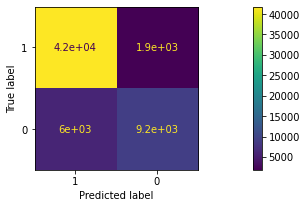

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicted_categories)
print(cm)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['1','0'])
cmd_obj.plot()
plt.show()